In [1]:
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import keras.backend as K
import numpy as np

from IPython import display
import matplotlib.pyplot as plt

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [13]:
# Fetch data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert uint8 pixel values to float32 in the range [0, 1] (for sigmoid)
X_test = X_test.astype('float32')
X_test /= 255

# Verify data
print X_test.shape, y_test.shape

(10000, 32, 32, 3) (10000, 1)


In [15]:
for epoch in range(10, 501, 10):
    discriminator = load_model("networks/disc-" + str(epoch) + ".h5")
    preds = discriminator.predict(X_test)
    K.clear_session() # Prevent running out of memory
    
    accuracy = 0
    for y, pred in zip(y_test, preds):
        joint_pred = pred[:10] + pred[10:] # Add real and generated probabilities together
        joint_pred_class = np.argmax(joint_pred)
        if y == joint_pred_class:
            accuracy += 1
    accuracy /= 1. * len(preds)

    print "Epoch {:d} test accuracy: {:.4f}".format(epoch, accuracy)

Epoch 10 test accuracy: 0.7575
Epoch 20 test accuracy: 0.7755
Epoch 30 test accuracy: 0.7968
Epoch 40 test accuracy: 0.8163
Epoch 50 test accuracy: 0.8231
Epoch 60 test accuracy: 0.8277
Epoch 70 test accuracy: 0.8208
Epoch 80 test accuracy: 0.8175
Epoch 90 test accuracy: 0.8207
Epoch 100 test accuracy: 0.8382
Epoch 110 test accuracy: 0.8351
Epoch 120 test accuracy: 0.8411
Epoch 130 test accuracy: 0.8351
Epoch 140 test accuracy: 0.8480
Epoch 150 test accuracy: 0.8401
Epoch 160 test accuracy: 0.8434
Epoch 170 test accuracy: 0.8458
Epoch 180 test accuracy: 0.8495
Epoch 190 test accuracy: 0.8363
Epoch 200 test accuracy: 0.8538
Epoch 210 test accuracy: 0.8467
Epoch 220 test accuracy: 0.8431
Epoch 230 test accuracy: 0.8518
Epoch 240 test accuracy: 0.8531
Epoch 250 test accuracy: 0.8557
Epoch 260 test accuracy: 0.8690
Epoch 270 test accuracy: 0.8669
Epoch 280 test accuracy: 0.8677
Epoch 290 test accuracy: 0.8649
Epoch 300 test accuracy: 0.8675
Epoch 310 test accuracy: 0.8680
Epoch 320 test ac

Epoch 250 generated images:


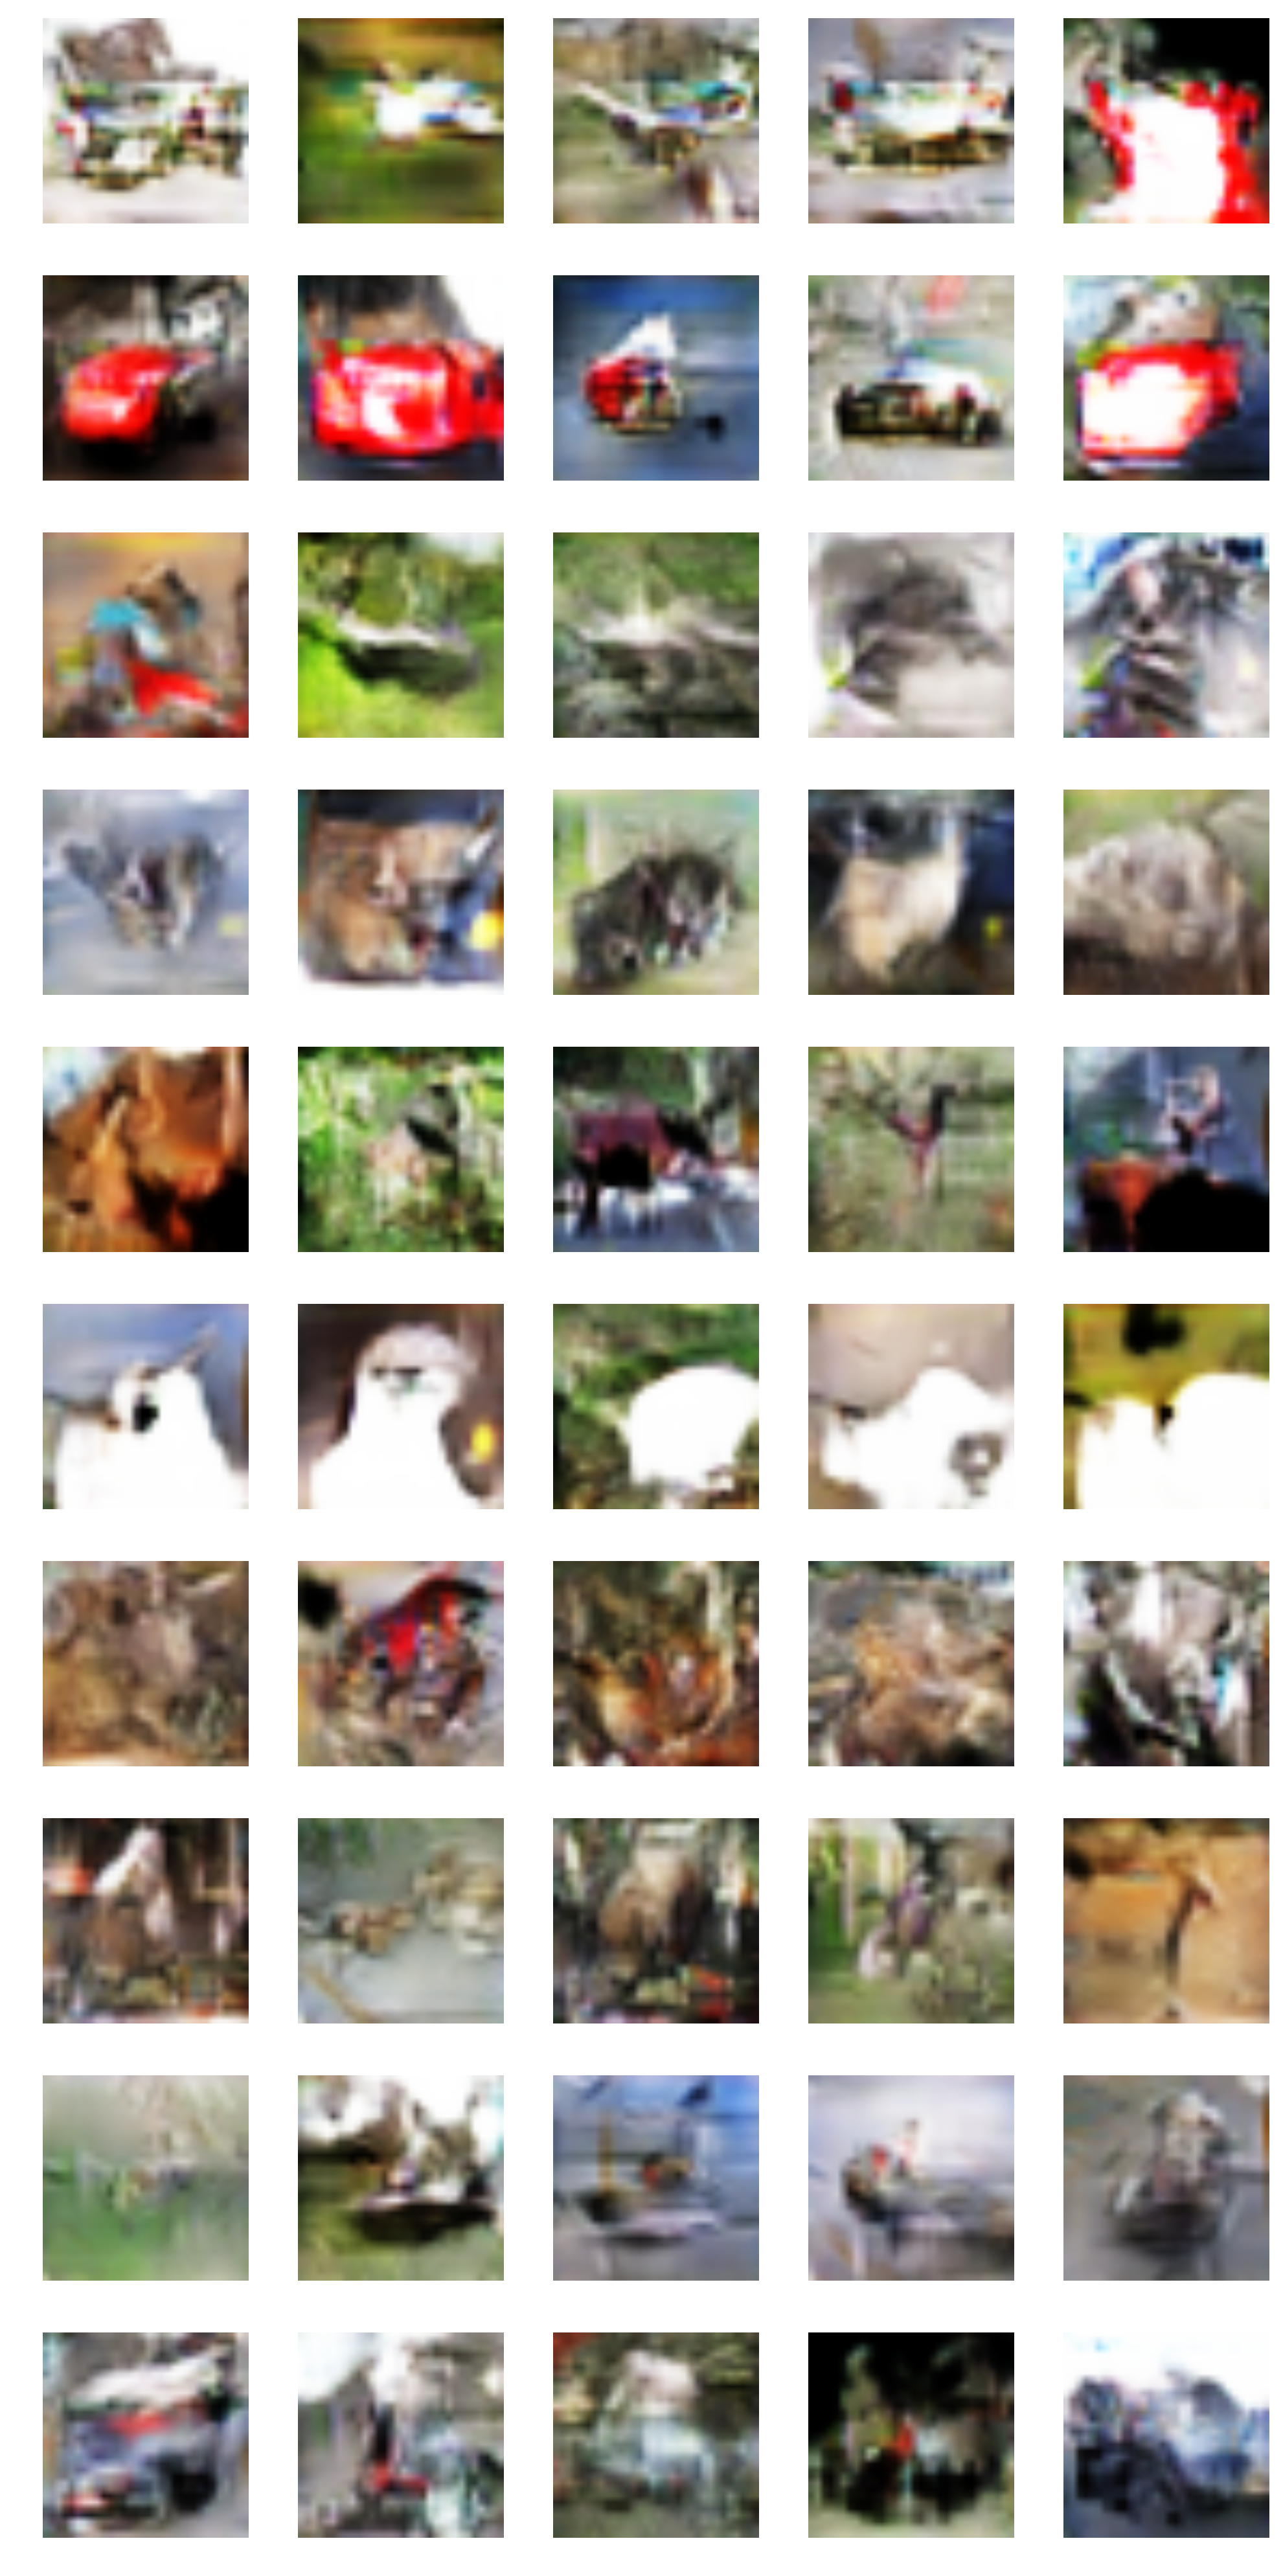

In [12]:
noise_size = 100
num_images = 50 # Must be a multiple of 10

for epoch in [250]: # range(10, 501, 10):
    generator = load_model("networks/gen-" + str(epoch) + ".h5")
    
    noise = np.random.uniform(0, 1, size=[num_images, noise_size])
    noise_class = np.zeros([num_images, 10])
    for image_class in range(10):
        row_start = image_class * num_images / 10
        row_end = (image_class + 1) * num_images / 10
        noise_class[row_start:row_end, image_class] = 1
        
    generated_images = generator.predict([noise, noise_class])
    K.clear_session() # Prevent running out of memory
    
    print "Epoch {:d} generated images:".format(epoch)

    plt.figure(figsize=(10, 20))
    for i in range(generated_images.shape[0]):
        plt.subplot(10, num_images / 10, i+1)
        img = generated_images[i,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()